# Project 3 - Part 1, Git Practice, APS1070 Fall 2023

**Deadline: November 3rd, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Declan
*   Your **student number**: Bracken



## Part 1: Getting started with Github [1 Mark + 1 Mark Git Submission]

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your city list as inputs (Yakeshi, Zamboanga, Norilsk, ...)
    * Plots time-series for the input list (it is best to plot each city in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each month should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `Yakeshi`, `Zamboanga`, `Norilsk`, `Juliaca`, and `Doha`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `Yakeshi`, `Zamboanga`, `Norilsk`, `Juliaca`, and `Doha`. What does it mean if the curve goes up or down? What does the sign of values indicate? **[0.25]**

In [18]:
import pandas as pd
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/TemperaturesbyCity.csv',
    index_col=0
)

In [42]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import numpy as np

def Plot_TimeSeries(df, city_list):

    num_cities = len(city_list)
    print(city_list)
    temp_data = df.loc[city_list]
    dates = pd.to_datetime(df.columns)
    height_per_subplot = 4
    total_height = height_per_subplot * num_cities
    num_ticks = 10
    interval = len(df.columns) // num_ticks

    fig, ax = plt.subplots(nrows=num_cities, figsize=(8, total_height), sharex=True)  # create subplots object

    ax = ax.flatten()

    # loop through cities and populate subplots
    for i, city in enumerate(city_list):
        ax[i].plot(dates, df.loc[city])
        ax[i].set_title('{}'.format(city))
        ax[i].set_xlabel('Date')
        ax[i].set_ylabel('Recorded Temperature')

        # Set the xticks and the corresponding labels
        subsampled_dates = dates[::interval]
        ax[i].set_xticks(subsampled_dates)
        ax[i].set_xticklabels(subsampled_dates.strftime('%Y-%m-%d'), rotation=45)

    plt.tight_layout()
    plt.show()


['Yakeshi', 'Zamboanga', 'Norilsk', 'Juliaca', 'Doha']


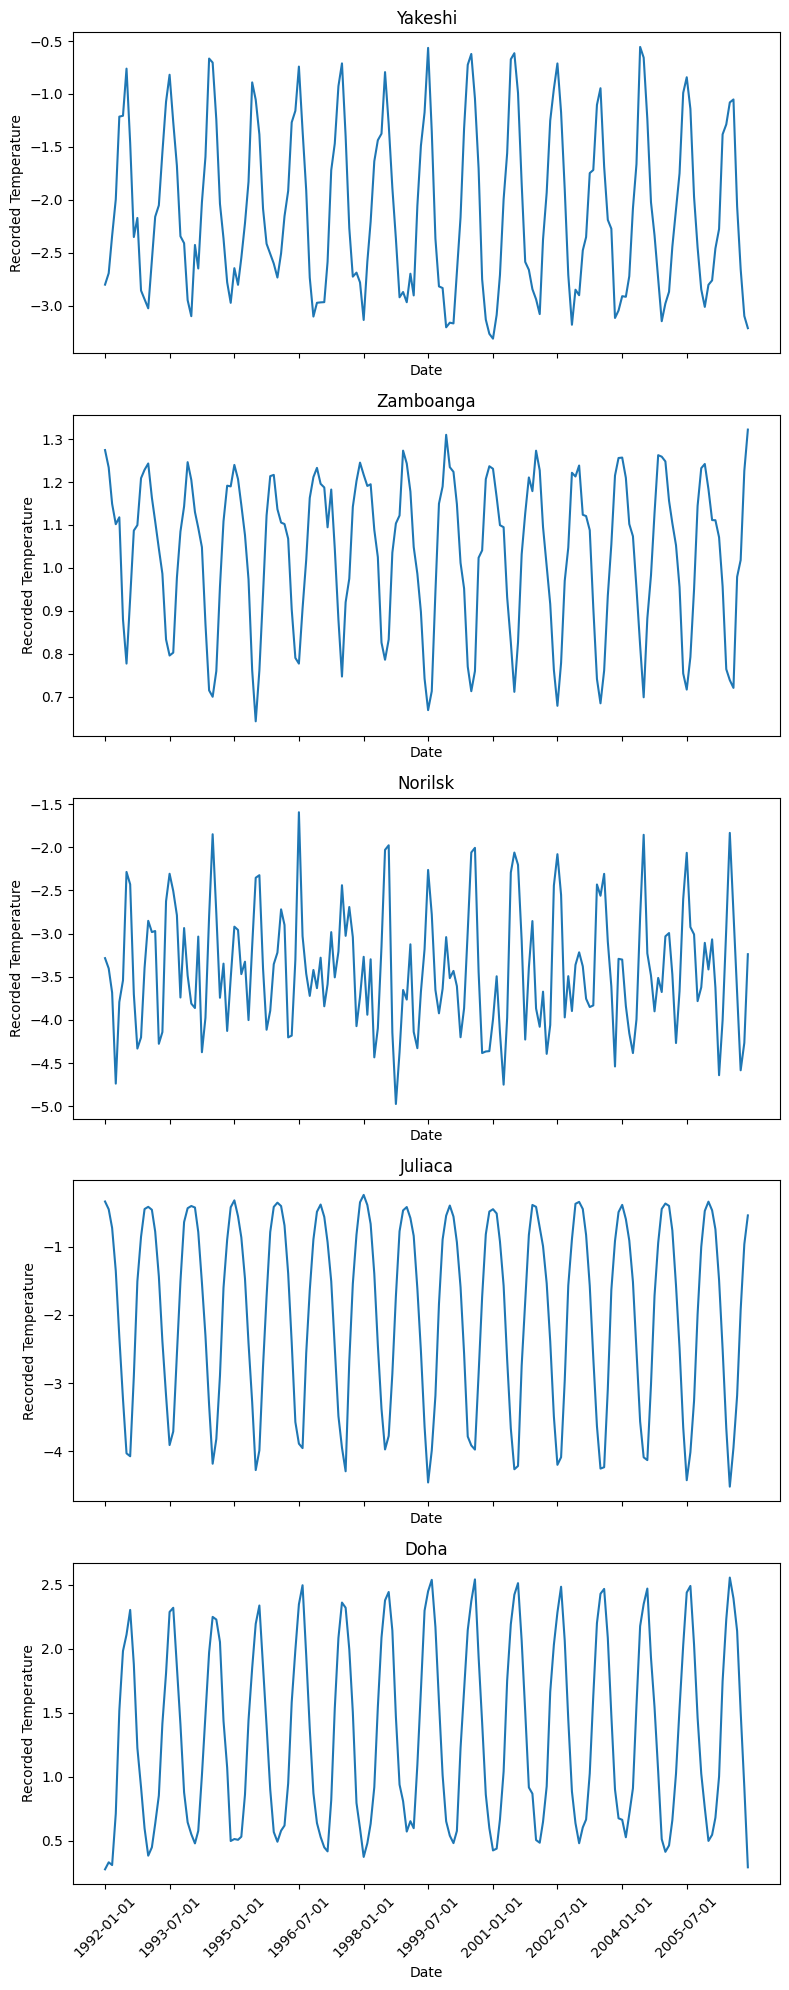

In [43]:
#Apply standard scalar
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the data
scaled_data = scaler.fit_transform(data_raw)

# Convert the numpy array back to a pandas DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_raw.columns, index=data_raw.index)

city_list = ['Yakeshi', 'Zamboanga', 'Norilsk', 'Juliaca', 'Doha']
Plot_TimeSeries(scaled_df, city_list)

In [ ]:
"""
Part 4:
When the curve goes up or down, it means that city is essentially changing seasons
from hot to cold, where each will have the same period of roughly 1 year when averaged.
All of the cities analyzed lie consistenly either above or below the average across
all cities when standardized each month. This tells me that for any given city
in the plots above, they are consistently either colder, or hotter than the average
city. The values on the y-axis essentially represent how cold or hot each city
is relative to the rest of the dataset. As a quick consistency check, the hot cities
are Doha, and Zamboanga, while the cold ones are Norilsk, Juliaca, Yakeshi. This
makes sense logically.
"""